In [2]:
range(6)

[0, 1, 2, 3, 4, 5]

In [4]:
import nflgame
games = nflgame.games(range(2009,2017))

In [5]:
print len(games)

2048


In [7]:

won = [0]*65
total = [0]*65
for game in games:
    if (game.winner == game.home):
        won[game.score_home] += 1
        total[game.score_home] += 1
        total[game.score_away] += 1
    else:
        won[game.score_away] += 1
        total[game.score_home] += 1
        total[game.score_away] += 1


/Users/tynanseltzer/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in divide
  import sys


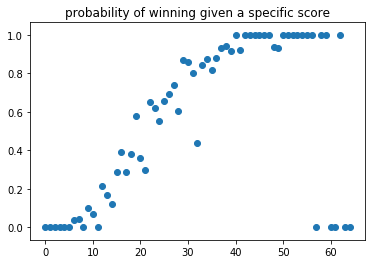

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.optimize import curve_fit
won = (np.array(won).astype(float))
total = np.array(total)
res = np.nan_to_num(won/total)
plt.scatter(range(65), (res))

plt.title("probability of winning given a specific score")
plt.show()